In [2]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from rubin_sim.scheduler.utils import Sky_area_generator

In [3]:
sag = Sky_area_generator()

In [4]:
result, labels = sag.return_maps()

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

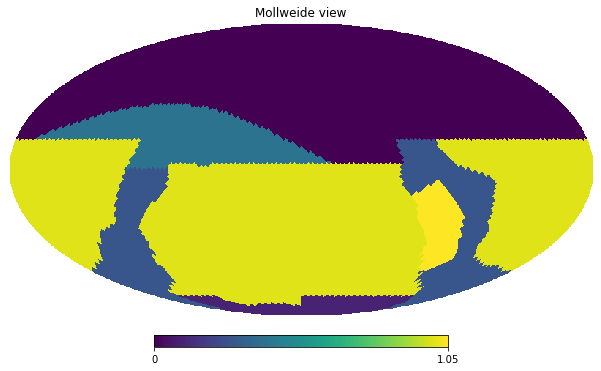

In [5]:
hp.mollview(result['r'])

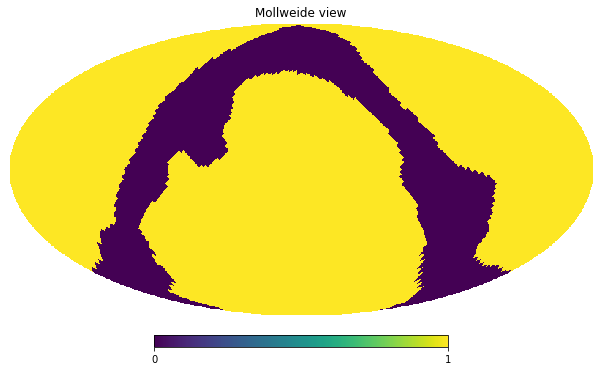

In [6]:
hp.mollview(sag.low_dust)

In [7]:
np.unique(labels)

array(['', 'LMC_SMC', 'bulge', 'dusty_plane', 'lowdust', 'nes', 'scp'],
      dtype='<U20')

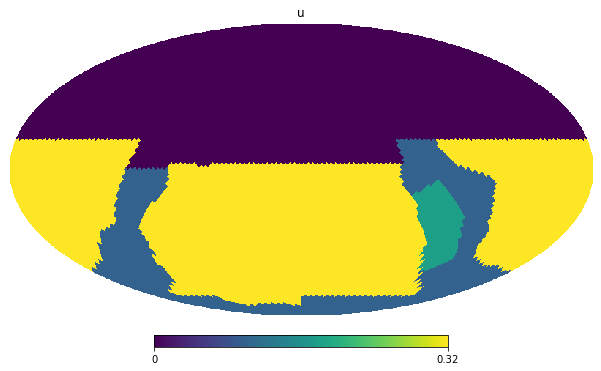

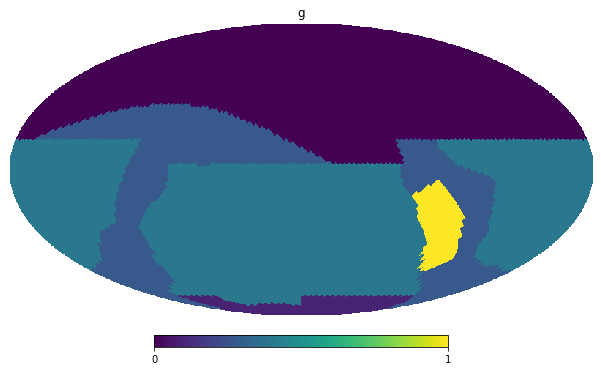

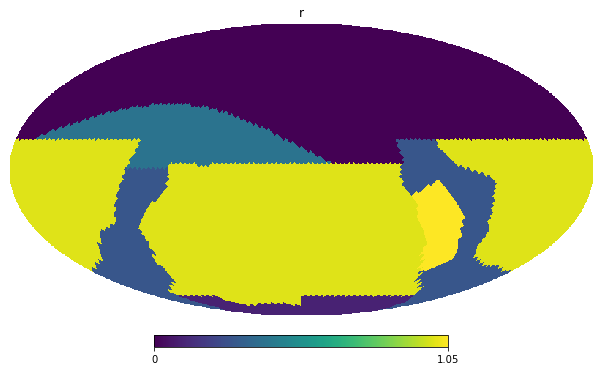

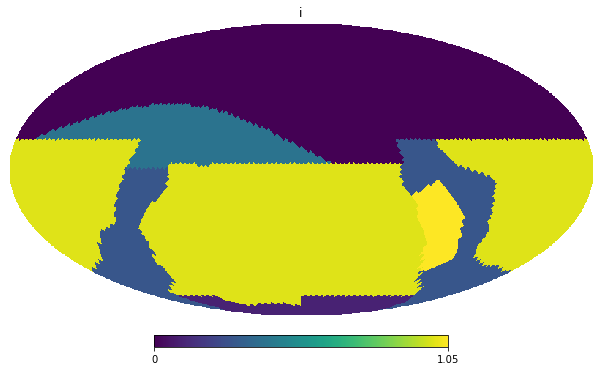

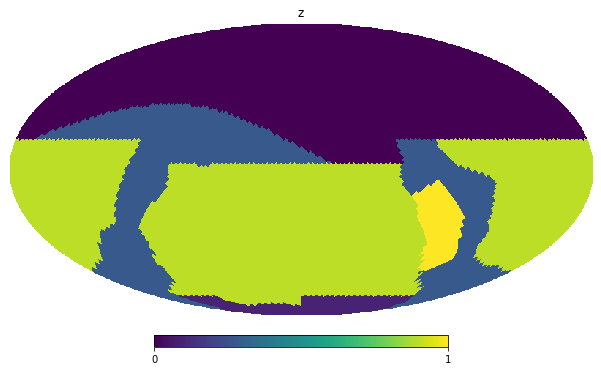

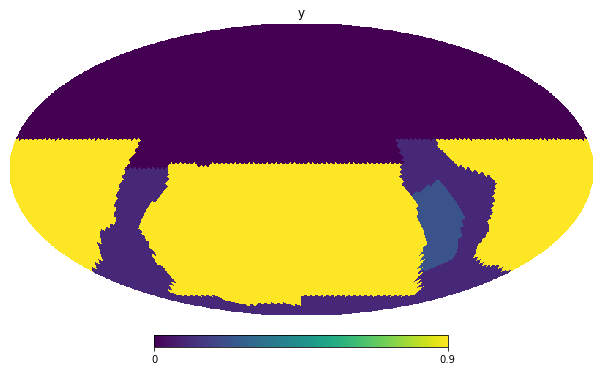

In [12]:
for key in result.dtype.names:
    hp.mollview(result[key], title=key)

In [8]:
osa = old_Sky_area_generator(nside=32)
osa.set_maps()
final_tot, footprints_hp = osa.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = osa.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval

NameError: name 'old_Sky_area_generator' is not defined

In [ ]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(footprints_hp[key]):
        label += ' %0.2f ' % val
    hp.mollview(footprints_hp[key], unit=label, title=key)

In [ ]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(result[key]):
        label += ' %0.2f ' % val
    hp.mollview(result[key], unit=label, title=key)

In [ ]:
for key in footprints_hp:
    print(key, footprints_hp[key][6818])

In [ ]:
indx = np.where(footprints_hp['r'] == 1)[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

In [ ]:
np.unique(footprints_hp['r'])

In [ ]:
indx = np.where((footprints_hp['r'] > 0.2) & (footprints_hp['r'] < 0.4))[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

In [ ]:
hp.mollview(footprints_hp['z'])

In [ ]:
np.unique(footprints_hp['z'])

In [ ]:
hp.mollview(osa.bulge)

In [ ]:
hp.mollview(osa.maps['gal'])

In [ ]:
for filtername in 'ugrizy':
    hp.mollview(footprints_hp[filtername] - result[filtername], title=filtername)